In [1]:
import numpy as np
import librosa, librosa.display
import matplotlib.pyplot as plt

import json
import os
import math
import random

from sklearn.model_selection import train_test_split
import tensorflow.keras as keras

In [2]:
sample_file = "drive/MyDrive/Genre_Classification/genrenew/bollypop/bp01.mp3"

In [3]:
signal, sample_rate = librosa.load(sample_file)

In [4]:
print(signal)

[ 0.01970823 -0.00225531 -0.03690787 ...  0.18017152  0.1424728
  0.12234616]


In [5]:
print(sample_rate)

22050


In [6]:
FIG_SIZE = (16,8)

Text(0.5, 1.0, 'waveform')

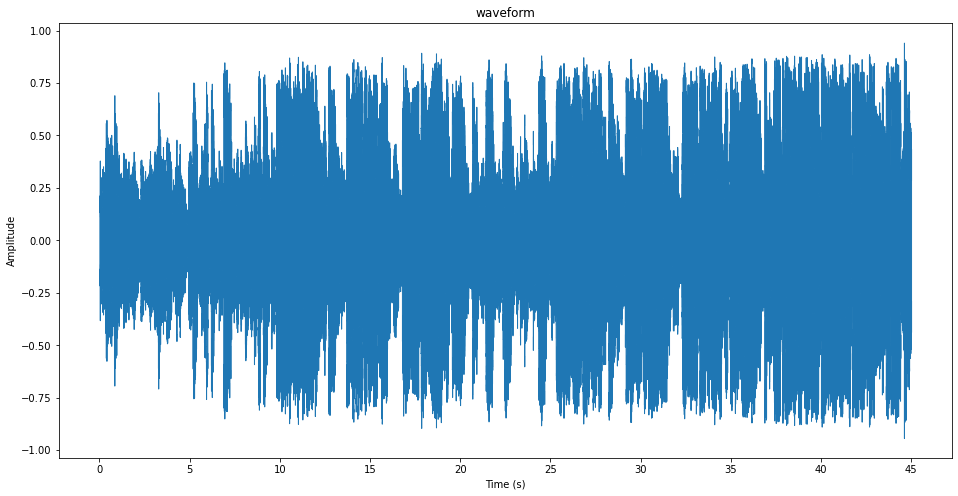

In [7]:
plt.figure(figsize=FIG_SIZE)
librosa.display.waveshow(signal, sr=sample_rate)

plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.title("waveform")

In [8]:
#fourier transform
fft = np.fft.fft(signal)

In [9]:
#magnitude from fft
spectrum = np.abs(fft)

In [10]:
f = np.linspace(0, sample_rate, len(spectrum))

Text(0.5, 1.0, 'Power Spectrum')

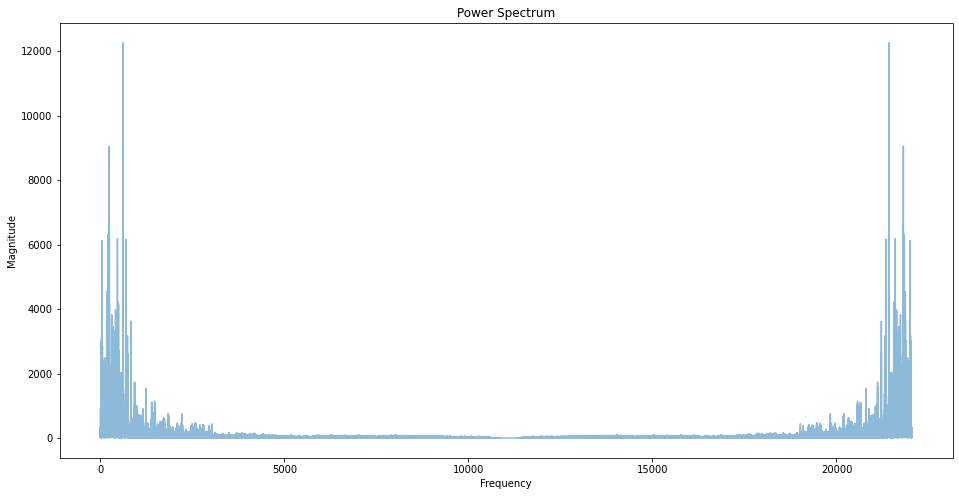

In [11]:
#plot spectrum
plt.figure(figsize = FIG_SIZE)
plt.plot(f, spectrum, alpha=0.5)
plt.xlabel("Frequency")
plt.ylabel("Magnitude")
plt.title("Power Spectrum")

In [12]:
left_spectrum = spectrum[:int(len(spectrum)/2)]
left_f = f[:int(len(spectrum)/2)]

Text(0.5, 1.0, 'Power Spectrum')

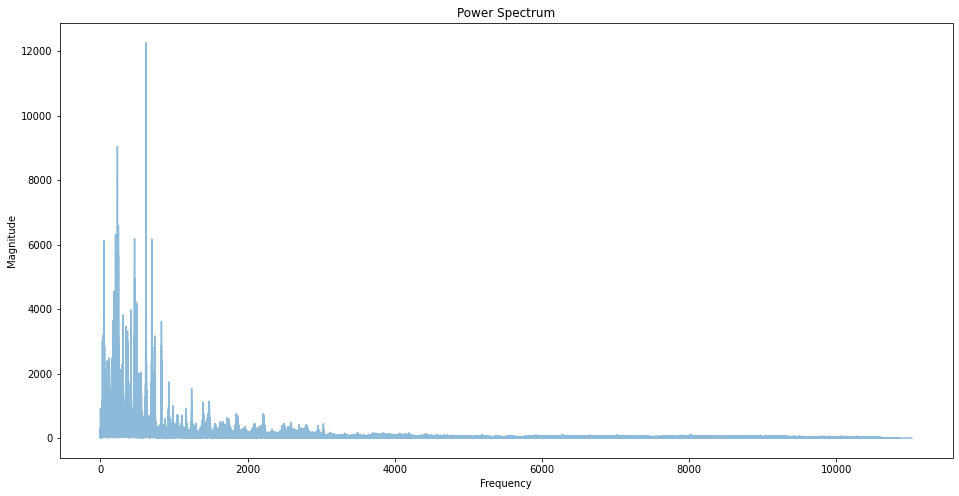

In [13]:
#plotting the left half of the spectrum
plt.figure(figsize=FIG_SIZE)
plt.plot(left_f, left_spectrum, alpha=0.5)
plt.xlabel("Frequency")
plt.ylabel("Magnitude")
plt.title("Power Spectrum")

In [14]:
#STFT
hop_length = 512 #num samples
n_fft = 2048 #num of samples for window

stft = librosa.stft(signal, n_fft=n_fft, hop_length=hop_length)

In [15]:
spectrogram = np.abs(stft)

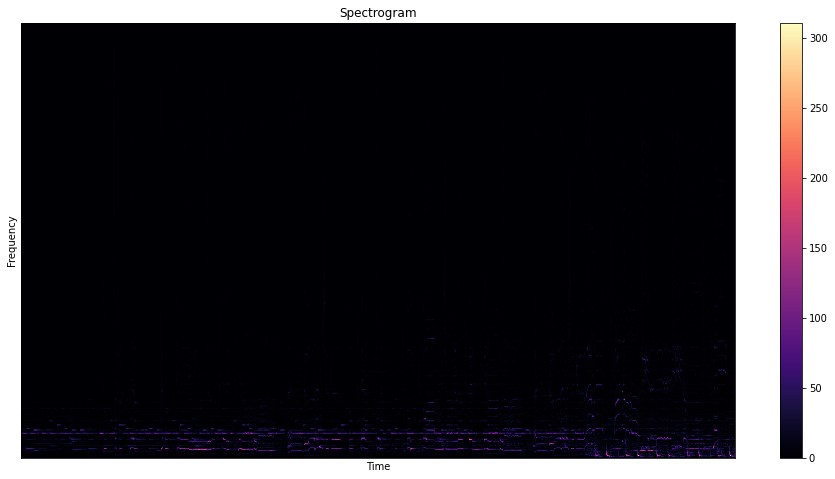

In [16]:
#plotting the spectrogram
plt.figure(figsize=FIG_SIZE)
librosa.display.specshow(spectrogram,sr=sample_rate,hop_length=hop_length)
plt.xlabel("Time")
plt.ylabel("Frequency")
plt.title("Spectrogram")
plt.colorbar()

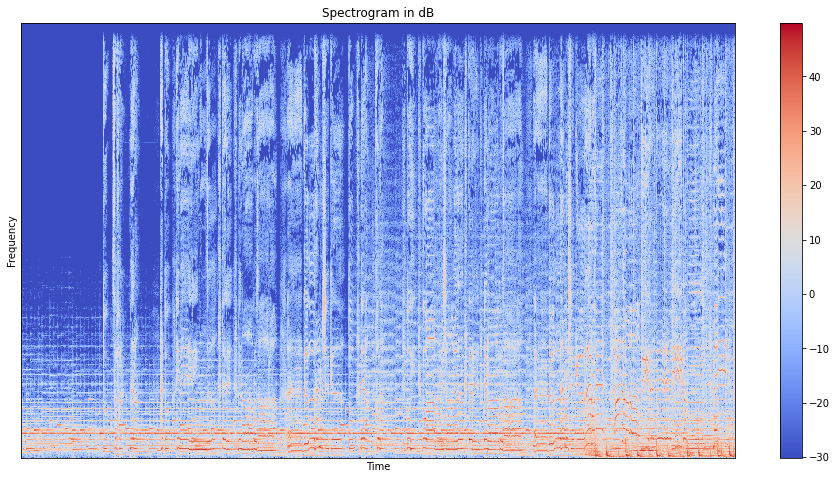

In [17]:
log_spectrogram = librosa.amplitude_to_db(spectrogram)

plt.figure(figsize = FIG_SIZE)
librosa.display.specshow(log_spectrogram, sr=sample_rate, hop_length=hop_length)
plt.xlabel("Time")
plt.ylabel("Frequency")
plt.title("Spectrogram in dB")
plt.colorbar()

In [18]:
MFCCs = librosa.feature.mfcc(y=signal, sr=sample_rate, n_fft = n_fft, n_mfcc=15,hop_length=hop_length,htk=False)

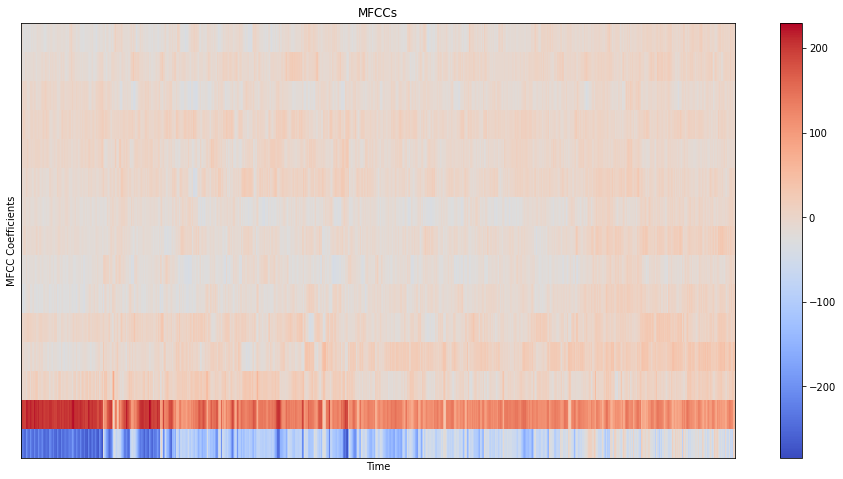

In [19]:
plt.figure(figsize=FIG_SIZE)
librosa.display.specshow(MFCCs, sr=sample_rate, hop_length=hop_length)
plt.xlabel("Time")
plt.ylabel("MFCC Coefficients")
plt.title("MFCCs")
plt.colorbar()

In [20]:
DATASET_PATH = "drive/MyDrive/Genre_Classification/genrenew"
JSON_PATH = "drive/MyDrive/Genre_Classification/data.json"
SAMPLE_RATE = 22050
TRACK_DURATION = 45
SAMPLES_PER_TRACK = SAMPLE_RATE * TRACK_DURATION

In [21]:
def save_mfcc(dataset_path, json_path, num_mfcc=13, n_fft=2048, hop_length=512, num_segments=5):
    """Extracts MFCCs from music dataset and saves them into a json file along with genre labels"""
    #dictionary to store mapping, labels and MFCCs
    data = {"mapping":[], "labels":[], "mfcc":[]}
    samples_per_segment = int(SAMPLES_PER_TRACK/ num_segments)
    num_mfcc_vectors_per_segment = math.ceil(samples_per_segment / hop_length)
    
    for i, (dirpath, dirnames, filenames) in enumerate(os.walk(dataset_path)):
        if dirpath is not dataset_path:
            semantic_label = dirpath.split("/")[-1]
            data["mapping"].append(semantic_label)
            print("\nProcessing: {}".format(semantic_label))
            
            for f in filenames:
                file_path = os.path.join(dirpath,f)
                signal, sample_rate = librosa.load(file_path, sr=SAMPLE_RATE)
                
                for d in range(num_segments):
                    start = samples_per_segment * d
                    finish = start + samples_per_segment
                    
                    mfcc = librosa.feature.mfcc(y=signal[start:finish], sr=sample_rate, n_mfcc = num_mfcc, n_fft=n_fft, hop_length=hop_length)
                    mfcc = mfcc.T
                    
                    if len(mfcc)==num_mfcc_vectors_per_segment:
                        data["mfcc"].append(mfcc.tolist())
                        data["labels"].append(i-1)
                        print("{}, segment: {}".format(file_path, d+1))
        with open(json_path, "w") as fp:
            json.dump(data, fp, indent = 4)
                

In [22]:
save_mfcc(DATASET_PATH, JSON_PATH, num_segments=10)


Processing: semiclassical
drive/MyDrive/Genre_Classification/genrenew/semiclassical/scl01.mp3, segment: 1
drive/MyDrive/Genre_Classification/genrenew/semiclassical/scl01.mp3, segment: 2
drive/MyDrive/Genre_Classification/genrenew/semiclassical/scl01.mp3, segment: 3
drive/MyDrive/Genre_Classification/genrenew/semiclassical/scl01.mp3, segment: 4
drive/MyDrive/Genre_Classification/genrenew/semiclassical/scl01.mp3, segment: 5
drive/MyDrive/Genre_Classification/genrenew/semiclassical/scl01.mp3, segment: 6
drive/MyDrive/Genre_Classification/genrenew/semiclassical/scl01.mp3, segment: 7
drive/MyDrive/Genre_Classification/genrenew/semiclassical/scl01.mp3, segment: 8
drive/MyDrive/Genre_Classification/genrenew/semiclassical/scl01.mp3, segment: 9
drive/MyDrive/Genre_Classification/genrenew/semiclassical/scl01.mp3, segment: 10
drive/MyDrive/Genre_Classification/genrenew/semiclassical/scl04.mp3, segment: 1
drive/MyDrive/Genre_Classification/genrenew/semiclassical/scl04.mp3, segment: 2
drive/MyDriv

/usr/local/lib/python3.9/dist-packages/librosa/core/spectrum.py:256: UserWarning: n_fft=2048 is too large for input signal of length=0
  warnings.warn(


drive/MyDrive/Genre_Classification/genrenew/semiclassical/scl68.mp3, segment: 1
drive/MyDrive/Genre_Classification/genrenew/semiclassical/scl68.mp3, segment: 2
drive/MyDrive/Genre_Classification/genrenew/semiclassical/scl68.mp3, segment: 3
drive/MyDrive/Genre_Classification/genrenew/semiclassical/scl68.mp3, segment: 4
drive/MyDrive/Genre_Classification/genrenew/semiclassical/scl68.mp3, segment: 5
drive/MyDrive/Genre_Classification/genrenew/semiclassical/scl68.mp3, segment: 6
drive/MyDrive/Genre_Classification/genrenew/semiclassical/scl68.mp3, segment: 7
drive/MyDrive/Genre_Classification/genrenew/semiclassical/scl68.mp3, segment: 8
drive/MyDrive/Genre_Classification/genrenew/semiclassical/scl68.mp3, segment: 9
drive/MyDrive/Genre_Classification/genrenew/semiclassical/scl68.mp3, segment: 10
drive/MyDrive/Genre_Classification/genrenew/semiclassical/scl75.mp3, segment: 1
drive/MyDrive/Genre_Classification/genrenew/semiclassical/scl75.mp3, segment: 2
drive/MyDrive/Genre_Classification/genr

In [23]:
## Classification

In [24]:
#path to json
DATA_PATH_2 = "drive/MyDrive/Genre_Classification/data.json" 

In [25]:
def load_data(data_path_2):
  with open(data_path_2, "r") as f:
    data = json.load(f)

  X = np.array(data["mfcc"])
  y = np.array(data["labels"])

  print("Data successfully loaded!")

  return X, y

In [26]:
X, y = load_data(DATA_PATH_2)

Data successfully loaded!


In [27]:
X.shape

(4996, 194, 13)

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [29]:
#simple ANN

In [30]:
#build network topology
model = keras.Sequential([
    #input layer
    keras.layers.Flatten(input_shape = (X.shape[1], X.shape[2])),

    #1st layer
    keras.layers.Dense(512, activation = 'relu'),

    keras.layers.Dense(256, activation = 'relu'),

    keras.layers.Dense(64, activation = 'relu'),

    keras.layers.Dense(10, activation = 'softmax'),   
])

In [31]:
#compile model
optimiser = keras.optimizers.Adam(learning_rate = 0.0001)
model.compile(optimizer=optimiser,
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

In [32]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 2522)              0         
                                                                 
 dense (Dense)               (None, 512)               1291776   
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 dense_2 (Dense)             (None, 64)                16448     
                                                                 
 dense_3 (Dense)             (None, 10)                650       
                                                                 
Total params: 1,440,202
Trainable params: 1,440,202
Non-trainable params: 0
_________________________________________________________________


In [33]:
#model training
history = model.fit(X_train, y_train, validation_data = (X_test, y_test), batch_size=32, epochs=100)

Epoch 1/100
110/110 [==============================] - 7s 9ms/step - loss: 9.4616 - accuracy: 0.4324 - val_loss: 4.7991 - val_accuracy: 0.4550
Epoch 2/100
110/110 [==============================] - 1s 5ms/step - loss: 3.5158 - accuracy: 0.5593 - val_loss: 3.8340 - val_accuracy: 0.5377
Epoch 3/100
110/110 [==============================] - 0s 4ms/step - loss: 2.1584 - accuracy: 0.6431 - val_loss: 3.7043 - val_accuracy: 0.5130
Epoch 4/100
110/110 [==============================] - 0s 4ms/step - loss: 1.3339 - accuracy: 0.7209 - val_loss: 3.2491 - val_accuracy: 0.5504
Epoch 5/100
110/110 [==============================] - 1s 5ms/step - loss: 0.9172 - accuracy: 0.7812 - val_loss: 3.1932 - val_accuracy: 0.5744
Epoch 6/100
110/110 [==============================] - 1s 5ms/step - loss: 0.6349 - accuracy: 0.8330 - val_loss: 3.1530 - val_accuracy: 0.5684
Epoch 7/100
110/110 [==============================] - 0s 4ms/step - loss: 0.4736 - accuracy: 0.8710 - val_loss: 2.9567 - val_accuracy: 0.5831

In [34]:
def plot_history(history):
  fig, axs = plt.subplots(2)

  #accuracy subplot
  axs[0].plot(history.history["accuracy"], label = "train accuracy")
  axs[0].plot(history.history["val_accuracy"], label = "test accuracy")
  axs[0].set_ylabel("Accuracy")
  axs[0].set_title("Accuracy eval")

  #error subplot
  axs[1].plot(history.history["loss"], label="train error")
  axs[1].plot(history.history["val_loss"], label = "test error")
  axs[1].set_ylabel("Error")
  axs[1].set_xlabel("Epoch")
  axs[1].legend(loc="upper right")
  axs[1].set_title("Error eval")

  plt.show()

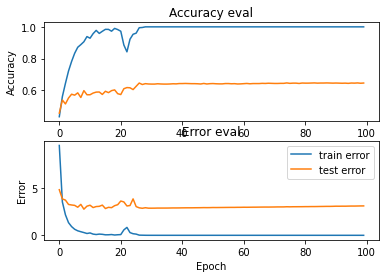

In [35]:
plot_history(history)

In [36]:
#managing overfitting
model_regularized = keras.Sequential([
    keras.layers.Flatten(input_shape=(X.shape[1], X.shape[2])),

    keras.layers.Dense(512, activation='relu', kernel_regularizer=keras.regularizers.l2(0.001)),
    keras.layers.Dropout(0.3),

    keras.layers.Dense(256, activation='relu', kernel_regularizer = keras.regularizers.l2(0.001)),
    keras.layers.Dropout(0.3),

    keras.layers.Dense(64, activation='relu', kernel_regularizer = keras.regularizers.l2(0.001)),
    keras.layers.Dropout(0.3),

    keras.layers.Dense(10, activation='softmax')
])

In [37]:
#compile the model
optimiser = keras.optimizers.Adam(learning_rate = 0.0001)
model_regularized.compile(optimizer=optimiser,
                          loss='sparse_categorical_crossentropy',
                          metrics=['accuracy'])

In [38]:
#train model
history = model_regularized.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size = 32, epochs=100)

Epoch 1/100
110/110 [==============================] - 2s 6ms/step - loss: 25.0736 - accuracy: 0.2150 - val_loss: 3.6367 - val_accuracy: 0.3476
Epoch 2/100
110/110 [==============================] - 1s 5ms/step - loss: 8.6336 - accuracy: 0.2519 - val_loss: 3.1011 - val_accuracy: 0.3169
Epoch 3/100
110/110 [==============================] - 1s 5ms/step - loss: 5.7471 - accuracy: 0.2648 - val_loss: 3.1273 - val_accuracy: 0.2995
Epoch 4/100
110/110 [==============================] - 1s 5ms/step - loss: 4.6056 - accuracy: 0.2880 - val_loss: 3.0879 - val_accuracy: 0.3869
Epoch 5/100
110/110 [==============================] - 1s 5ms/step - loss: 4.0847 - accuracy: 0.3123 - val_loss: 3.0489 - val_accuracy: 0.3763
Epoch 6/100
110/110 [==============================] - 1s 5ms/step - loss: 3.7203 - accuracy: 0.3357 - val_loss: 2.8774 - val_accuracy: 0.4383
Epoch 7/100
110/110 [==============================] - 0s 4ms/step - loss: 3.4800 - accuracy: 0.3386 - val_loss: 2.7373 - val_accuracy: 0.416

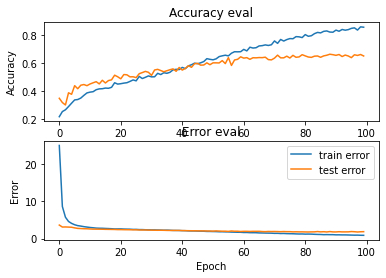

In [39]:
plot_history(history)

In [40]:
#cnn

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=0.2)

#add an axis to input sets
X_train = X_train[..., np.newaxis]
X_validation = X_validation[..., np.newaxis]
X_test = X_test[...,np.newaxis]

In [42]:
input_shape = (X_train.shape[1], X_train.shape[2], 1)

In [43]:
#building the CNN
model_cnn = keras.Sequential()

#1st conv layer
model_cnn.add(keras.layers.Conv2D(32, (3, 3), activation = 'relu', input_shape = input_shape))
model_cnn.add(keras.layers.MaxPooling2D((3, 3), strides = (2, 2), padding = 'same'))
model_cnn.add(keras.layers.BatchNormalization())

#2nd conv layer
model_cnn.add(keras.layers.Conv2D(32, (3, 3), activation = 'relu'))
model_cnn.add(keras.layers.MaxPooling2D((3, 3), strides = (2, 2), padding = 'same'))
model_cnn.add(keras.layers.BatchNormalization())

#3rd conv layer
model_cnn.add(keras.layers.Conv2D(32, (2, 2), activation = 'relu'))
model_cnn.add(keras.layers.MaxPooling2D((2, 2), strides = (2, 2), padding = 'same'))
model_cnn.add(keras.layers.BatchNormalization())

#flattened output fed to dense layer
model_cnn.add(keras.layers.Flatten())
model_cnn.add(keras.layers.Dense(64, activation='relu'))
model_cnn.add(keras.layers.Dropout(0.3))

#output layer
model_cnn.add(keras.layers.Dense(10, activation = 'softmax'))

In [44]:
#compile model
optimiser = keras.optimizers.Adam(learning_rate=0.0001)
model_cnn.compile(optimizer=optimiser,
                  loss='sparse_categorical_crossentropy',
                  metrics = ['accuracy'])

In [45]:
model_cnn.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 192, 11, 32)       320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 96, 6, 32)        0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 96, 6, 32)        128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 94, 4, 32)         9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 47, 2, 32)        0         
 2D)                                                             
                                                      

In [46]:
history = model_cnn.fit(X_train, y_train, validation_data = (X_validation, y_validation), batch_size = 32, epochs=50)

Epoch 1/50
94/94 [==============================] - 9s 11ms/step - loss: 3.0361 - accuracy: 0.1418 - val_loss: 2.8422 - val_accuracy: 0.2333
Epoch 2/50
94/94 [==============================] - 1s 6ms/step - loss: 1.9188 - accuracy: 0.3807 - val_loss: 1.7001 - val_accuracy: 0.4573
Epoch 3/50
94/94 [==============================] - 1s 7ms/step - loss: 1.5694 - accuracy: 0.4915 - val_loss: 1.3434 - val_accuracy: 0.5667
Epoch 4/50
94/94 [==============================] - 1s 6ms/step - loss: 1.3606 - accuracy: 0.5415 - val_loss: 1.2215 - val_accuracy: 0.5867
Epoch 5/50
94/94 [==============================] - 1s 6ms/step - loss: 1.2979 - accuracy: 0.5489 - val_loss: 1.1681 - val_accuracy: 0.5880
Epoch 6/50
94/94 [==============================] - 1s 6ms/step - loss: 1.1789 - accuracy: 0.5809 - val_loss: 1.1091 - val_accuracy: 0.6067
Epoch 7/50
94/94 [==============================] - 1s 6ms/step - loss: 1.0994 - accuracy: 0.6053 - val_loss: 1.0734 - val_accuracy: 0.6107
Epoch 8/50
94/94 [=

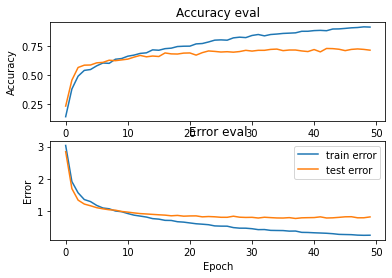

In [47]:
plot_history(history)

In [48]:
#evaluating on test set
test_loss, test_acc = model_cnn.evaluate(X_test, y_test, verbose=2)
print('\nTest accuracy: ', test_acc)

40/40 - 0s - loss: 0.8231 - accuracy: 0.7038 - 174ms/epoch - 4ms/step

Test accuracy:  0.7037630081176758


In [49]:
model_cnn.save("Indian_Music_Gnere_Classification_CNN")

In [50]:
## prediction on test set 1

In [51]:
X_to_predict = X_test[100]
y_to_predict = y_test[100]

In [52]:
X_to_predict.shape

(194, 13, 1)

In [53]:
print("Real genre: ", y_to_predict)

Real genre:  2


In [54]:
X_to_predict = X_to_predict[np.newaxis, ...]

In [55]:
X_to_predict.shape

(1, 194, 13, 1)

In [56]:
#prediction
prediction = model_cnn.predict(X_to_predict)

1/1 [==============================] - 0s 121ms/step


In [57]:
predicted_index = np.argmax(prediction, axis=1)
print("Predicted genre: ", int(predicted_index))

Predicted genre:  2


In [58]:
#prediction on test set 2

In [59]:
X_to_predict = X_test[24]
y_to_predict = y_test[24]

print('Real Genre: ', y_to_predict)

X_to_predict = X_to_predict[np.newaxis, ...]

prediction = model_cnn.predict(X_to_predict)

#getting the index with max value
predicted_index = np.argmax(prediction, axis=1)
print("Predicted Genre: ", int(predicted_index))

Real Genre:  1
1/1 [==============================] - 0s 24ms/step
Predicted Genre:  3


In [60]:
for n in range(10):
  i = random.randint(0, len(X_test))
  X_to_predict = X_test[i]
  y_to_predict = y_test[i]

  print("\nReal Genre: ", y_to_predict)

  X_to_predict = X_to_predict[np.newaxis, ...]
  prediction = model_cnn.predict(X_to_predict)

  predicted_index = np.argmax(prediction, axis=1)
  print("Predicted Genre: ", int(predicted_index))



Real Genre:  1
1/1 [==============================] - 0s 19ms/step
Predicted Genre:  1

Real Genre:  1
1/1 [==============================] - 0s 20ms/step
Predicted Genre:  1

Real Genre:  0
1/1 [==============================] - 0s 21ms/step
Predicted Genre:  0

Real Genre:  2
1/1 [==============================] - 0s 22ms/step
Predicted Genre:  2

Real Genre:  0
1/1 [==============================] - 0s 19ms/step
Predicted Genre:  0

Real Genre:  2
1/1 [==============================] - 0s 19ms/step
Predicted Genre:  2

Real Genre:  2
1/1 [==============================] - 0s 21ms/step
Predicted Genre:  2

Real Genre:  4
1/1 [==============================] - 0s 28ms/step
Predicted Genre:  4

Real Genre:  2
1/1 [==============================] - 0s 21ms/step
Predicted Genre:  2

Real Genre:  1
1/1 [==============================] - 0s 21ms/step
Predicted Genre:  1


In [61]:
#for new songs
def process_input(audio_file, track_duration):
  SAMPLE_RATE = 22050
  NUM_MFCC = 13
  N_FFT = 2048
  HOP_LENGTH = 512
  TRACK_DURATION = track_duration
  SAMPLES_PER_TRACK = SAMPLE_RATE * TRACK_DURATION
  NUM_SEGMENTS = 10

  samples_per_segment = int(SAMPLES_PER_TRACK / NUM_SEGMENTS)
  num_mfcc_vectors_per_segment = math.ceil(samples_per_segment / HOP_LENGTH)

  signal, sample_rate = librosa.load(audio_file, sr= SAMPLE_RATE)

  for d in range(10):
    start = samples_per_segment * d
    finish = start + samples_per_segment
    mfcc = librosa.feature.mfcc(y=signal[start:finish], sr=sample_rate, n_mfcc=NUM_MFCC,n_fft = N_FFT, hop_length=HOP_LENGTH,htk=False)
    mfcc = mfcc.T

    return mfcc

In [62]:
genre_dict = {0:'semi classical',1:'sufi',2:'carnatic',3:'bollywood pop',4:'ghazal'}

In [73]:
new_input_mfcc = process_input("drive/MyDrive/Genre_Classification/genrenew/Tumk_dekha_to.mp3.mp3",45)

In [74]:
type(new_input_mfcc)

numpy.ndarray

In [75]:
new_input_mfcc.shape

(194, 13)

In [76]:
X_to_predict = new_input_mfcc[np.newaxis, ..., np.newaxis]
X_to_predict.shape

(1, 194, 13, 1)

In [77]:
prediction = model_cnn.predict(X_to_predict)
predicted_index = np.argmax(prediction, axis=1)

print("Predicted genre: ", genre_dict[int(predicted_index)])

1/1 [==============================] - 0s 33ms/step
Predicted genre:  bollywood pop
